<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import time, warnings
import seaborn as sns 
%pylab inline
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

np.random.seed(123456)
import os
os.chdir(r"F:\Formation")
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
donnees = pd.read_csv('donnees/mushrooms.csv')
donnees.columns = [str(x).replace('-','_')
                       for x in list(donnees.columns)]

donnees.drop('veil_type', 1, inplace=True)
donnees.rename(columns={'class': 'Cible'}, inplace=True)
donnees.head()

,Cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [4]:
import copy as cp
donneesSav = cp.deepcopy(donnees)

In [5]:
donnees.cap_shape.sort_values().unique()

array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object)

In [6]:
dictCS = {n:i for i,n in enumerate(list(donnees.cap_shape.sort_values().unique()))}
donnees.cap_shape.apply(lambda x: dictCS[x])

0       5
1       5
2       0
3       5
4       5
       ..
8119    3
8120    5
8121    2
8122    3
8123    5
Name: cap_shape, Length: 8124, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
import copy as cp
modelsLEd = {} 

for col in donnees.columns:
    labelencoder=LabelEncoder()
    labelencoder.fit(donnees[col])
    modelsLEd[col] = cp.deepcopy(labelencoder)

In [8]:
import pickle
pickle_file = "champignonsLE.pickle"

with open(pickle_file, 'wb') as f:
    pickle.dump( modelsLEd,f)

In [9]:
pickle_file = "champignonsLE.pickle"

with open(pickle_file, 'rb') as f:
    modelsLEd = pickle.load(f)

In [10]:
donnees.head()    

,Cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [11]:
for col in donnees.columns:
    donnees[col] = modelsLEd[col].transform(donnees[col])
    
donnees.head()    

,Cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


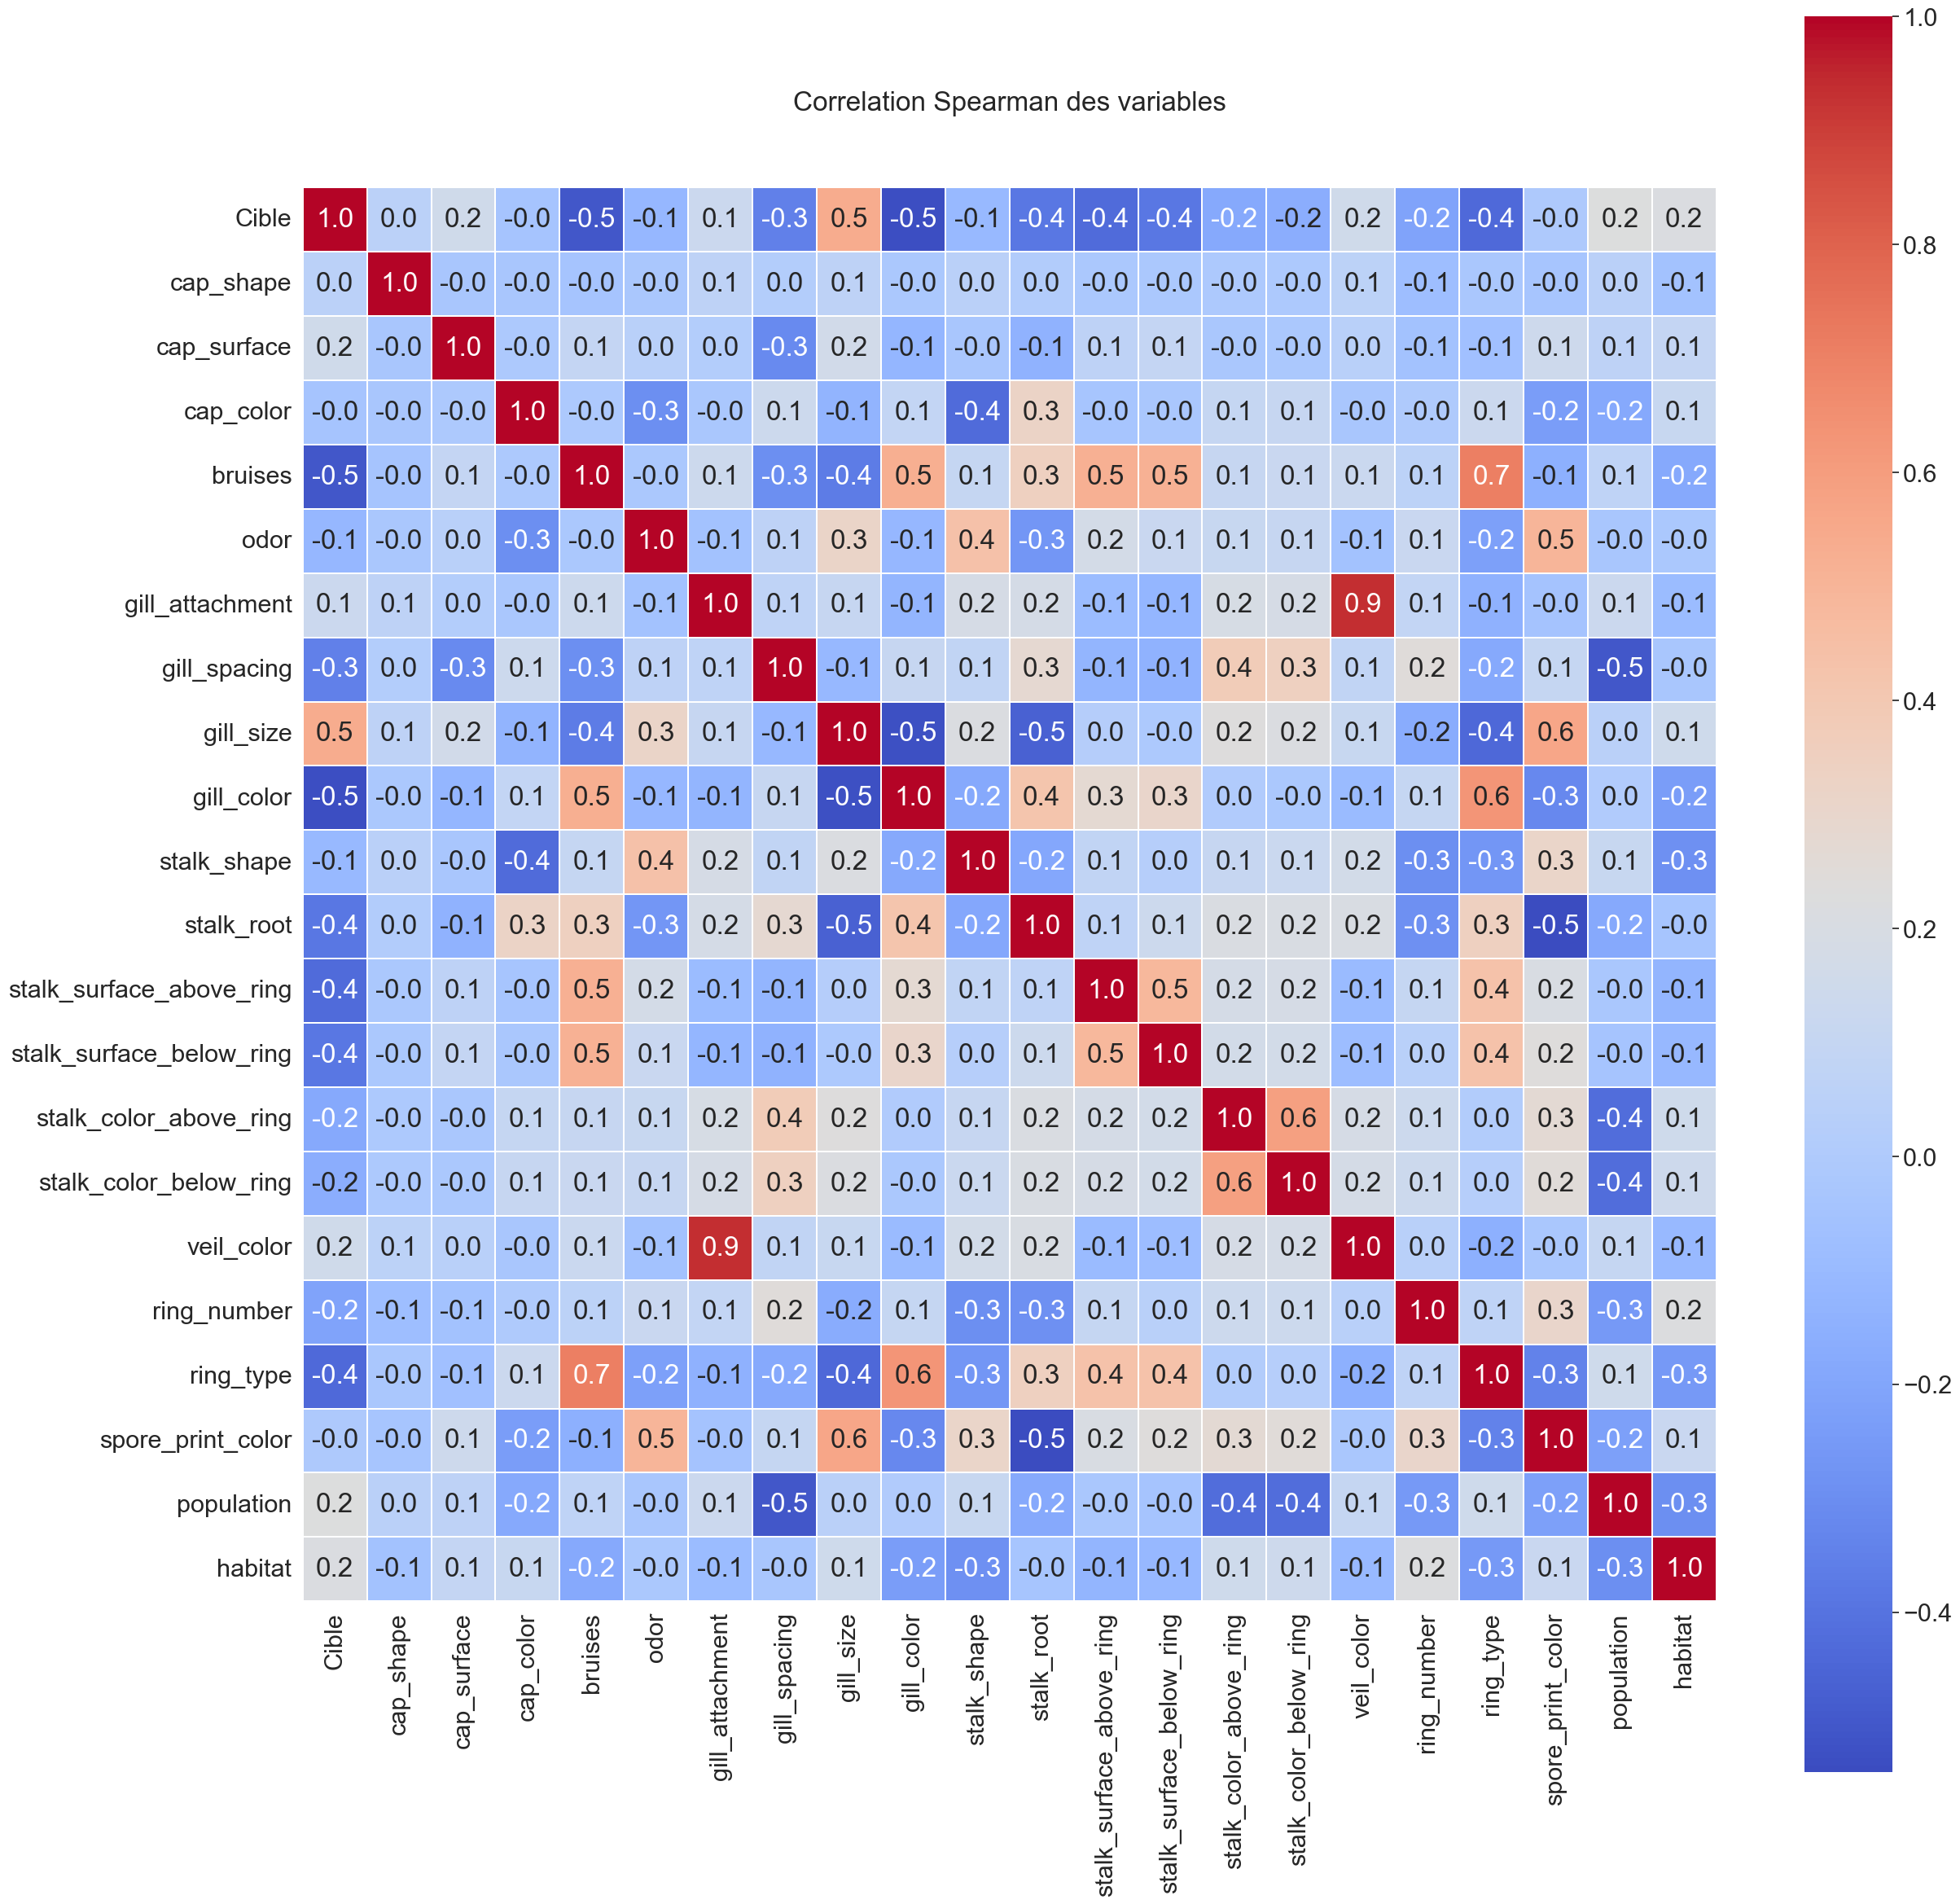

In [12]:
plt.figure(figsize=(28,28))
sns.set(font_scale=2)
plt.title('Correlation Spearman des variables', y=1.05, size=24)
sns.heatmap(donnees.corr(method='spearman'), fmt= '.1f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

In [13]:
donnees.columns

Index(['Cible', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [14]:
donnees.shape

(8124, 22)

In [15]:
donnees.reset_index().head()

,index,Cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,2,7,7,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,2,7,7,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,2,7,7,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,2,7,7,2,1,4,2,3,5
4,4,0,5,2,3,0,5,1,1,0,...,2,2,7,7,2,1,0,3,0,1


In [16]:
donnees.cap_shape.unique()

array([5, 0, 4, 2, 3, 1])

In [17]:
from sklearn.model_selection import train_test_split
X_traitement, X_validation, y_traitement, y_validation = train_test_split(
    donnees.drop(columns='Cible'), 
    donnees.Cible, 
    test_size=0.2, 
    random_state=0, 
    stratify = donnees.Cible) 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_traitement, 
    y_traitement, 
    test_size=0.2, 
    random_state=0, 
    stratify = y_traitement) 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    donnees.iloc[:,1:], 
    donnees.Cible, 
    test_size=0.12, 
    random_state=0, 
    stratify = donnees.Cible) 

In [20]:
indexTrain = X_train.reset_index().iloc[:,0].values
indexTest  = X_test.reset_index().iloc[:,0].values


import pickle
pickle_file = "champignons.Index.pickle"

with open(pickle_file, 'wb') as f:
    pickle.dump( indexTrain  ,f)
    pickle.dump( indexTest   ,f)  

In [21]:
import pickle
pickle_file = "champignons.Index.pickle"

with open(pickle_file, 'rb') as f:
    indexTrain = pickle.load(f)
    indexTest  = pickle.load(f)

In [22]:
X_train, X_test, y_train, y_test = donnees.filter(items=indexTrain,axis=0).drop(columns=['Cible'],axis=1),\
                                   donnees.filter(items=indexTest ,axis=0).drop(columns=['Cible'],axis=1),\
                                   donnees.filter(items=indexTrain,axis=0).Cible,\
                                   donnees.filter(items=indexTest ,axis=0).Cible

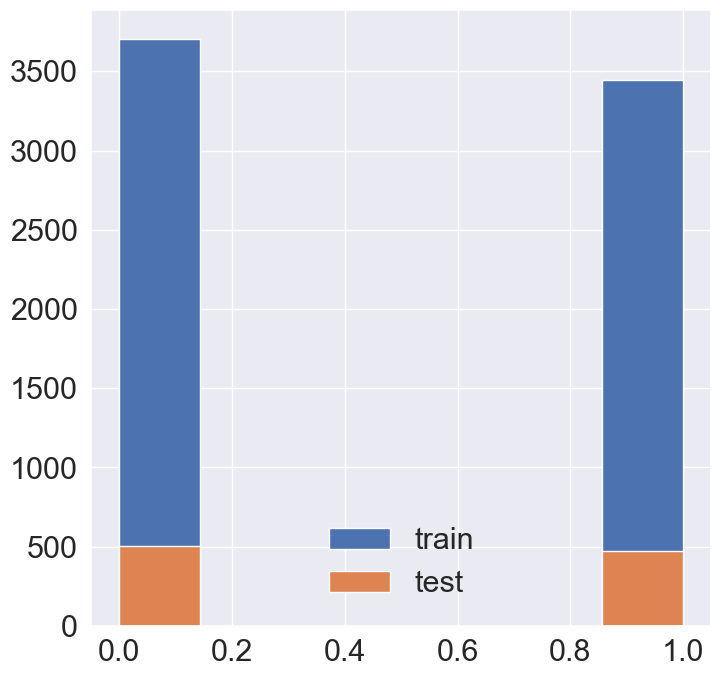

In [23]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc

names = ["Decision Tree", 
         "Random Forest",
         "AdaBoost",
         "Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         #"Gaussian Process",
         "Neural Net", 
         "Naive Bayes", 
         "QDA"
        ]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=3, 
                           n_estimators=1000, max_features=5),    
    AdaBoostClassifier(n_estimators=1000),    
    KNeighborsClassifier(10),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=0.8, C=0.025, probability=True),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

classifiersD = {x:y for x,y in zip(names,classifiers)}

Decision Tree     97.9487	--	Area under the ROC curve : 0.9965	--	Exécution  :.03s
Random Forest     99.0769	--	Area under the ROC curve : 0.9976	--	Exécution  :2.60s
AdaBoost          100.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :4.61s
Nearest Neighbors 99.8974	--	Area under the ROC curve : 1.0000	--	Exécution  :.37s
Linear SVM        94.7692	--	Area under the ROC curve : 0.9606	--	Exécution  :3.81s
RBF SVM           51.7949	--	Area under the ROC curve : 1.0000	--	Exécution  :19.88s
Neural Net        99.7949	--	Area under the ROC curve : 1.0000	--	Exécution  :5.19s
Naive Bayes       92.2051	--	Area under the ROC curve : 0.9509	--	Exécution  :.02s
QDA               99.6923	--	Area under the ROC curve : 0.9988	--	Exécution  :.03s


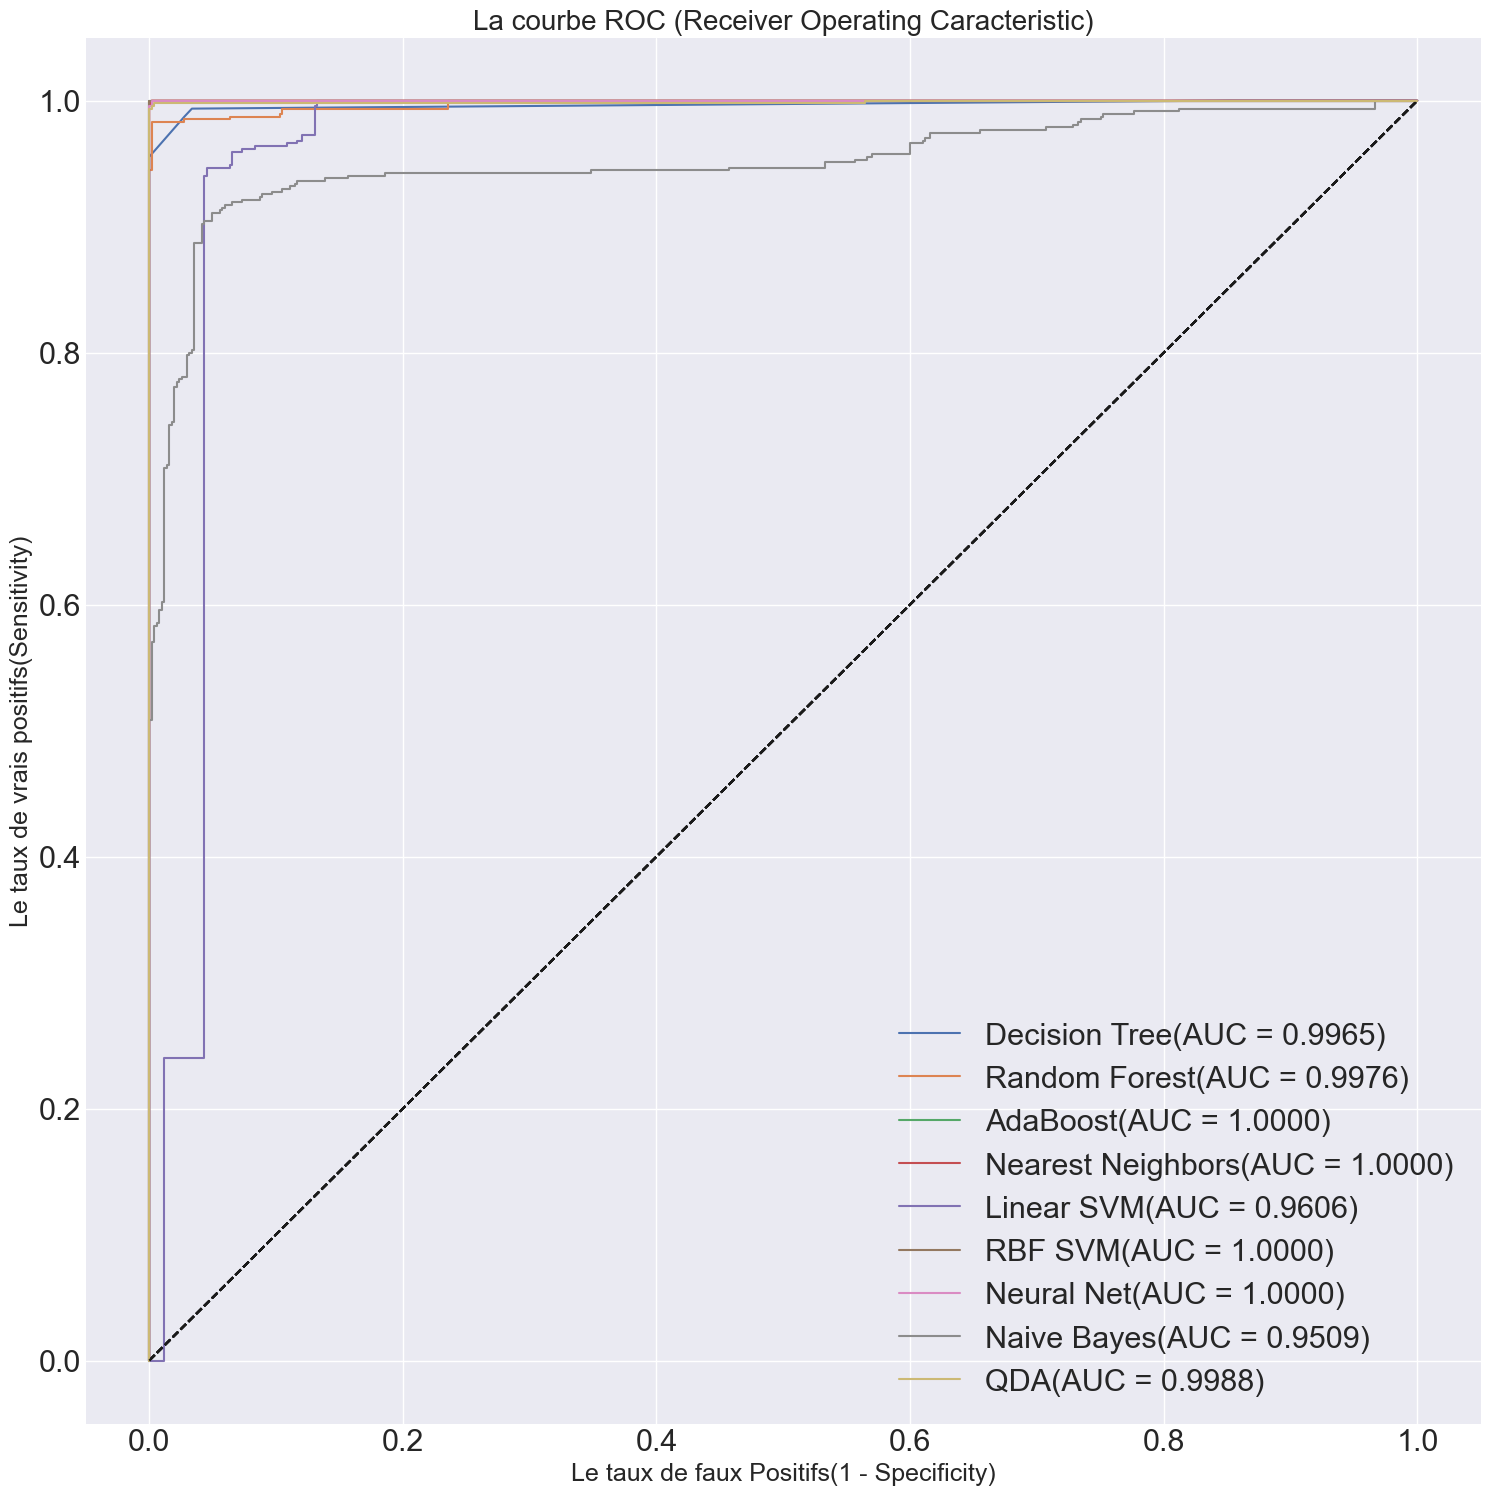

Exécution  :36.94s


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
np.random.seed(123456)
t0 = time.time()  
h = .02  # step size in the mesh

import seaborn as sns
plt.figure(figsize=(18,18))
plt.style.use('seaborn-darkgrid')

for name in classifiersD:
    clf = classifiersD[name]
    t1 = time.time()  
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)*100
    print(f'{name:17s}'+(' %.4f' % score).lstrip('0'),end='\t--\t')
    probas = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %0.4f" % roc_auc,end='\t--\t')
    plt.plot(fpr, tpr, label=name + '(AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
    plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
    plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
    plt.legend(loc="lower right")
    print('Exécution  :'+('%.2fs' % (time.time() - t1)).lstrip('0'))
plt.show()
      
print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

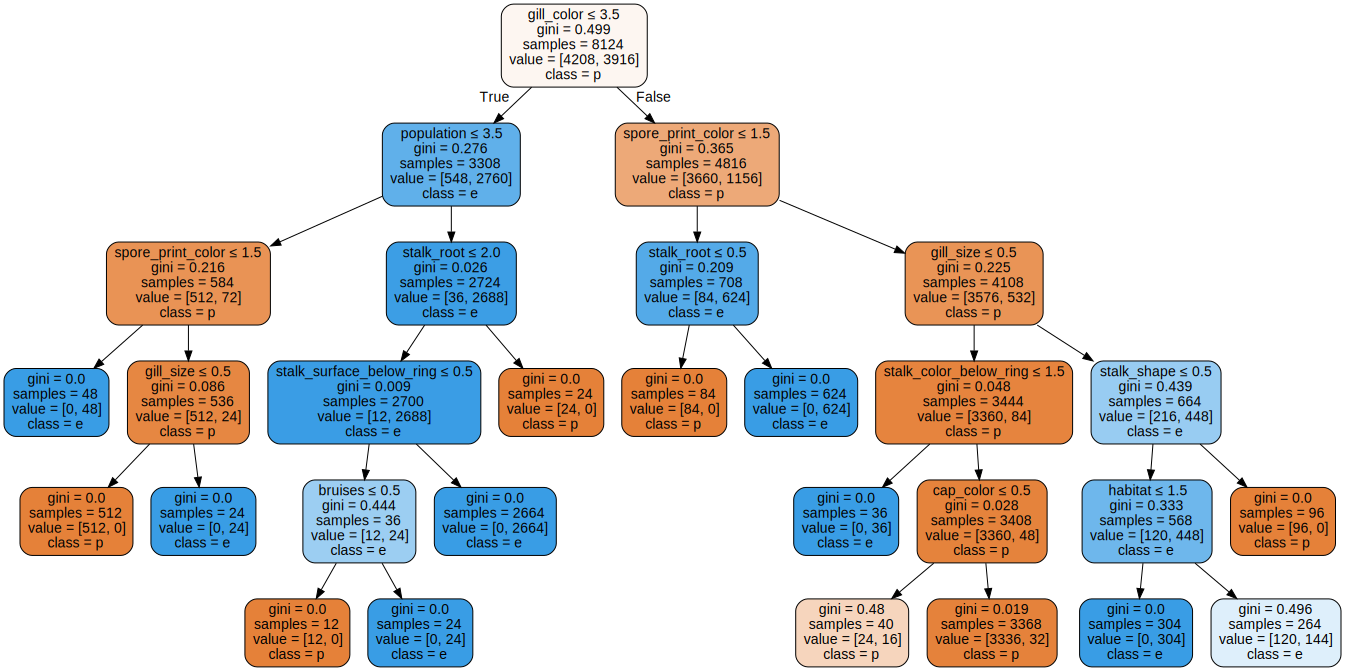

In [26]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

X = donnees.drop(columns=['Cible'])
y = pd.Series(modelsLEd['Cible'].inverse_transform(donnees.Cible))

classifieur = DecisionTreeClassifier(max_depth=5)#classifiersD['Decision Tree']
classifieur.fit(X,y)
import graphviz 
dot_data = export_graphviz(classifieur, 
                out_file=None, 
                feature_names=X.columns,  
                class_names=y.unique(),  
                filled=True, 
                rounded=True,  
                special_characters=True) 
graph = graphviz.Source(dot_data,
                        filename='ArbreDecissionChampignons01', 
                        directory='C:/Solutions/Classifications',
                        format='png')
#graph = graphviz.Source(dot_data)
graph.render()
graph

In [27]:
donnees = cp.deepcopy(donneesSav)
donnees['Cible'] = modelsLEd['Cible'].transform(donneesSav['Cible'])

In [28]:
donnees.head()

,Cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [32]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(separator='_')
vec.fit(donnees.drop(columns='Cible').to_dict('records'))
X_category = vec.transform(donnees.drop(columns='Cible').to_dict('records'))
train_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)
train_category.head()

,bruises_f,bruises_t,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,...,stalk_surface_above_ring_s,stalk_surface_above_ring_y,stalk_surface_below_ring_f,stalk_surface_below_ring_k,stalk_surface_below_ring_s,stalk_surface_below_ring_y,veil_color_n,veil_color_o,veil_color_w,veil_color_y
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
def createColumnsQualitatives(donnees,col):
    valeurs = donnees[col].unique()
    valeurs.sort()
    for i in valeurs : 
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)

In [29]:
for col in donnees.drop(columns='Cible').columns:
    createColumnsQualitatives(donnees,col)

In [30]:
donnees.head()

,Cible,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [31]:
X_train, X_test, y_train, y_test = donnees.filter(items=indexTrain,axis=0).drop(columns=['Cible'],axis=1),\
                                   donnees.filter(items=indexTest ,axis=0).drop(columns=['Cible'],axis=1),\
                                   donnees.filter(items=indexTrain,axis=0).Cible,\
                                   donnees.filter(items=indexTest ,axis=0).Cible

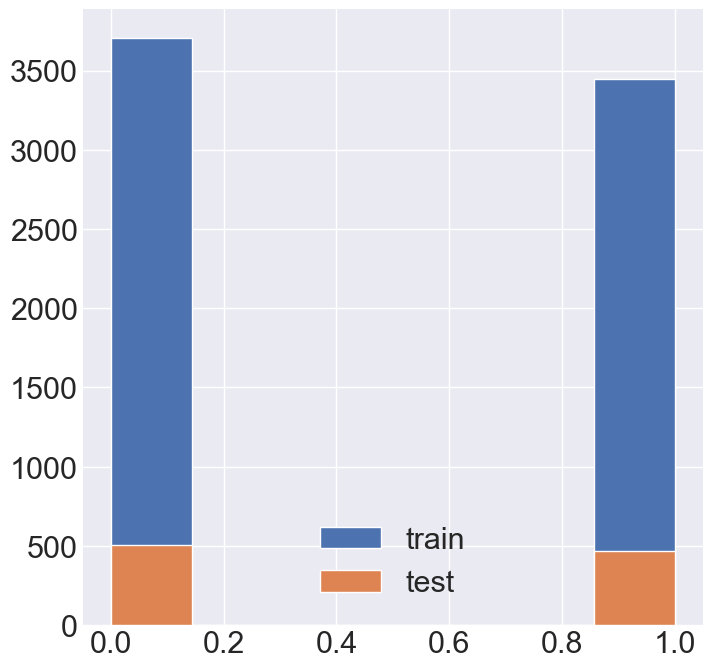

In [32]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();

Decision Tree     100.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.05s
Random Forest     93.8462	--	Area under the ROC curve : 0.9983	--	Exécution  :2.36s
AdaBoost          100.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :12.66s
Nearest Neighbors 100.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.44s
Linear SVM        99.8974	--	Area under the ROC curve : 1.0000	--	Exécution  :1.69s
RBF SVM           51.7949	--	Area under the ROC curve : 1.0000	--	Exécution  :30.57s
Neural Net        99.8974	--	Area under the ROC curve : 1.0000	--	Exécution  :1.67s
Naive Bayes       95.0769	--	Area under the ROC curve : 0.9960	--	Exécution  :.03s
QDA               100.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.29s


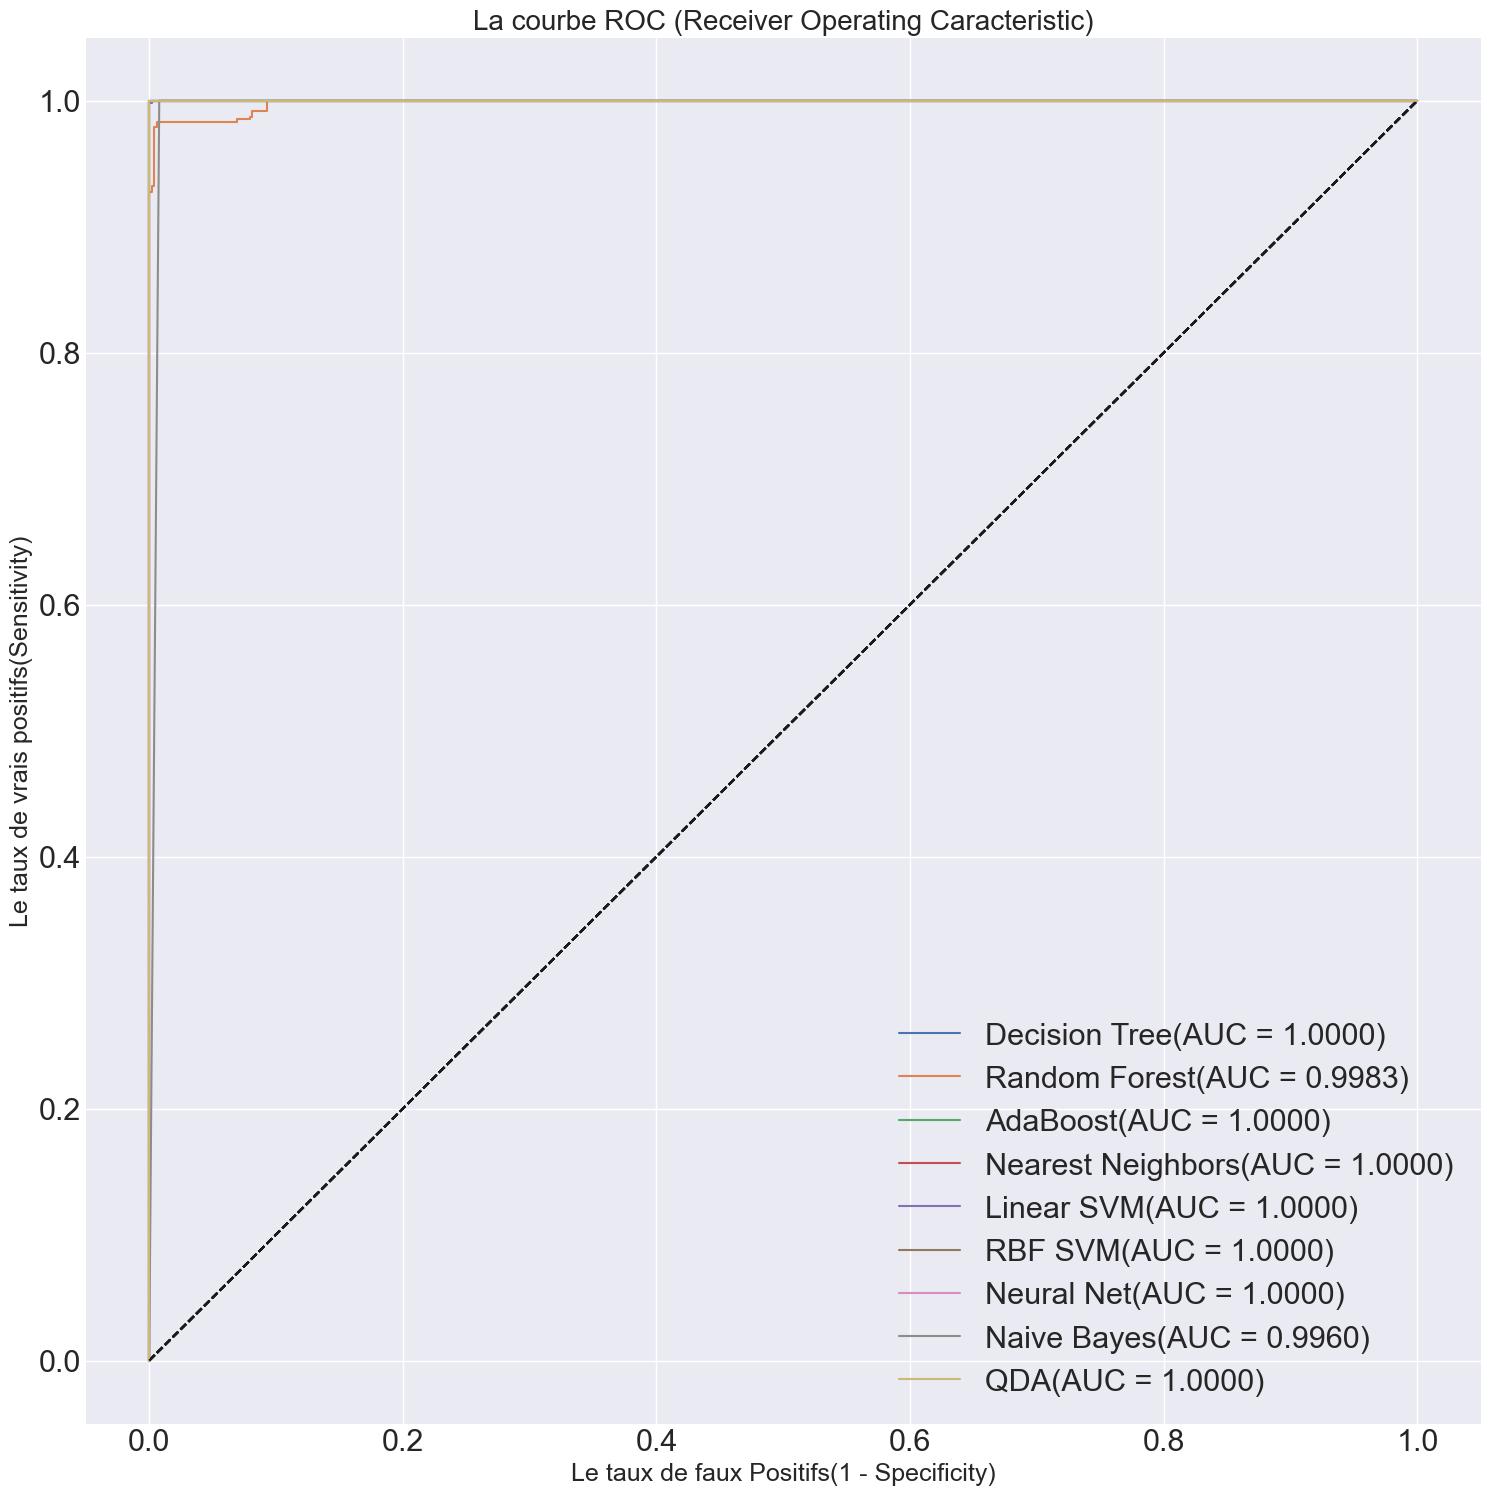

Exécution  :50.13s


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
np.random.seed(123456)
t0 = time.time()  
h = .02  # step size in the mesh

import seaborn as sns
plt.figure(figsize=(18,18))
plt.style.use('seaborn-darkgrid')

for name in classifiersD:
    clf = classifiersD[name]
    t1 = time.time()  
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)*100
    print(f'{name:17s}'+(' %.4f' % score).lstrip('0'),end='\t--\t')
    probas = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %0.4f" % roc_auc,end='\t--\t')
    plt.plot(fpr, tpr, label=name + '(AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
    plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
    plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
    plt.legend(loc="lower right")
    print('Exécution  :'+('%.2fs' % (time.time() - t1)).lstrip('0'))
plt.show()
      
print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

In [34]:
pd.crosstab(classifiersD['AdaBoost'].predict(X_test),y_test)

Cible,0,1
row_0,,
0,505,0
1,0,470


In [35]:
pd.crosstab(classifiersD['Linear SVM'].predict(X_test),y_test)

Cible,0,1
row_0,,
0,505,1
1,0,469


In [36]:
pd.crosstab(classifiersD['Neural Net'].predict(X_test),y_test)

Cible,0,1
row_0,,
0,505,1
1,0,469


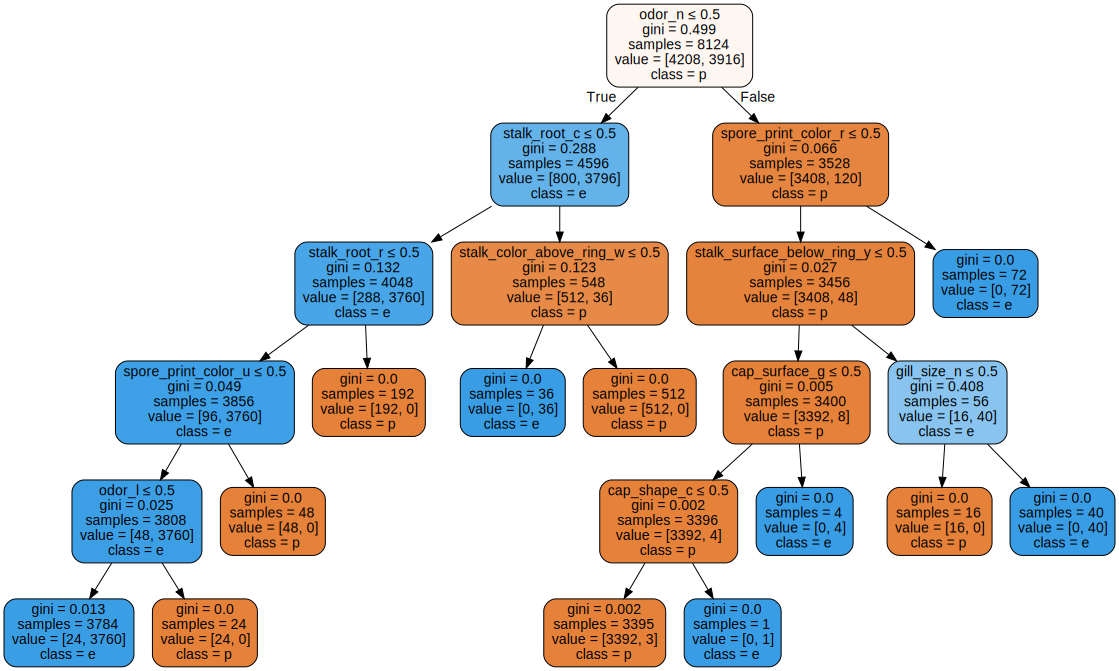

In [37]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

X = donnees.drop(columns=['Cible'])
y = pd.Series(modelsLEd['Cible'].inverse_transform(donnees.Cible))

classifieur = DecisionTreeClassifier(max_depth=5)#classifiersD['Decision Tree']
classifieur.fit(X,y)
import graphviz 
dot_data = export_graphviz(classifieur, 
                out_file=None, 
                feature_names=X.columns,  
                class_names=y.unique(),  
                filled=True, 
                rounded=True,  
                special_characters=True) 
graph = graphviz.Source(dot_data,
                        filename='ArbreDecissionChampignons02', 
                        directory='C:/Solutions/Classifications',
                        format='png')
#graph = graphviz.Source(dot_data)
graph.render()
graph

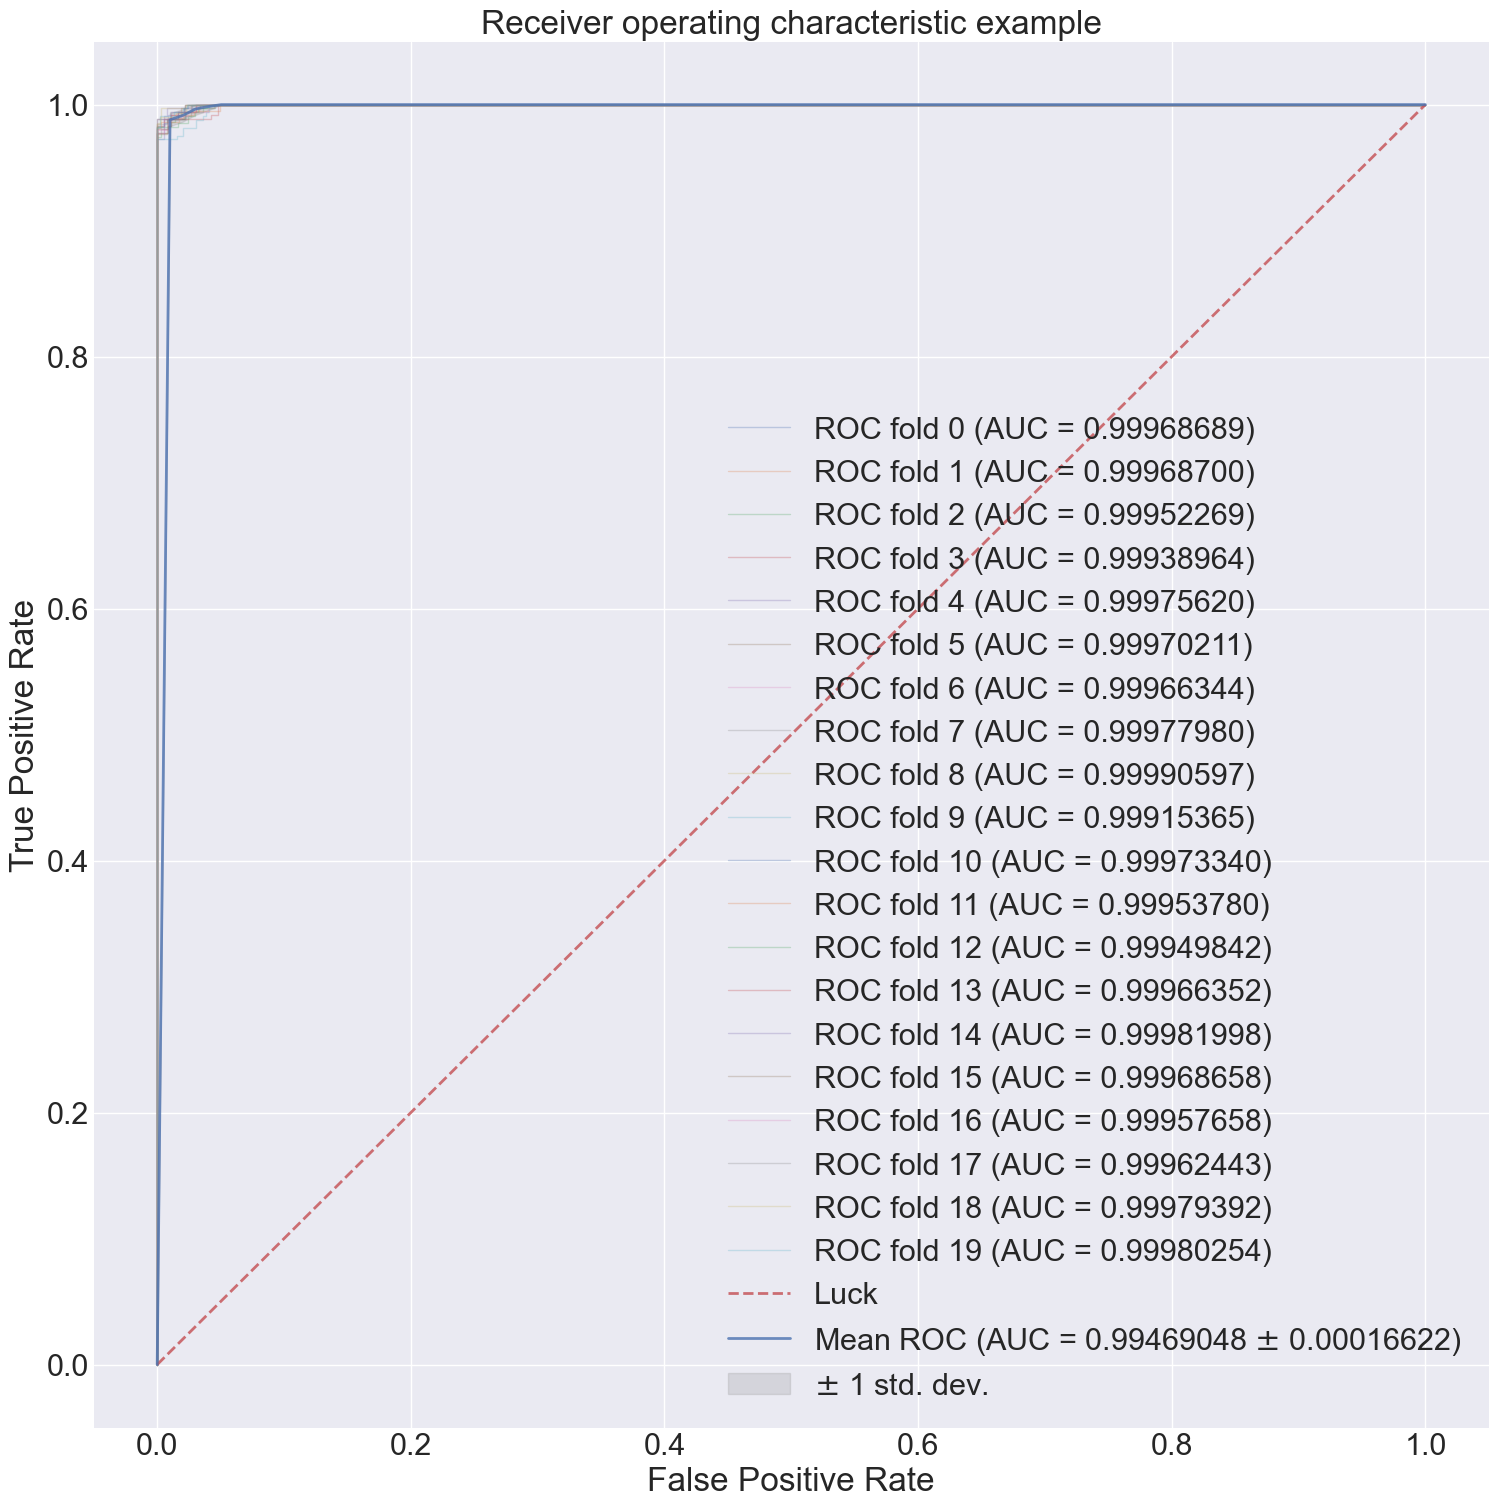

In [38]:
from scipy import interp
from sklearn import svm
from itertools import cycle

from sklearn import linear_model

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import RepeatedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = X_train.values
y = y_train.ravel()

n_samples, n_features = X.shape

# #############################################################################
# Classification and ROC analysis
nb_separations = 10
nb_repetitions = 2
random_state = 12883823
# Run classifier with cross-validation and plot ROC curves
#cv = KFold(n_splits=nb_separations)
#cv = StratifiedKFold(n_splits=nb_separations)
cv = RepeatedKFold(n_splits=nb_separations, n_repeats=nb_repetitions, random_state=random_state)

import copy as cp
classifieurs = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(18,18))
i = 0
for train, test in cv.split(X, y):
    classifier = RandomForestClassifier(max_depth=5, 
                           n_estimators=1000, max_features=4)
    classifier.fit(X[train], y[train])
    classifieurs.append(cp.deepcopy(classifier))
    
    probas_ = classifier.predict_proba(X[test])
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.8f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.8f $\pm$ %0.8f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [39]:
X_test.shape

(975, 116)

In [40]:
df = pd.DataFrame(data= y_test)
df.columns = ['y_test']
df['resultats'] = np.zeros(df.shape[0])

for i in range(nb_separations*nb_repetitions):
    df['resultats'] += classifieurs[i].predict_proba(X_test)[:,1]

df['resultats'] /= nb_separations*nb_repetitions

df['y_pred'] = df.resultats.round()
df.head()

,y_test,resultats,y_pred
4453,1,0.922630,1.0
6025,1,0.915424,1.0
6304,1,0.940492,1.0
6736,1,0.940193,1.0
1405,1,0.566326,1.0


In [41]:
from sklearn.metrics import roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                            precision_score, recall_score, f1_score, jaccard_similarity_score, \
                            precision_recall_curve
def afficheMetrics(y_test,y_pred):
    accuracy                 = accuracy_score          (y_test,y_pred)
    logloss                  = log_loss                (y_test,y_pred)
    hammingloss              = hamming_loss            (y_test,y_pred)
    precision                = precision_score         (y_test,y_pred)
    sensibilite              = recall_score            (y_test,y_pred)
    f1                       = f1_score                (y_test,y_pred)
    jaccard_similarity       = jaccard_similarity_score(y_test,y_pred)
    print(
          " Accuracy           : %.2f%%\n" % (accuracy * 100.0),       
          "logloss            : %.6f\n" % logloss           ,
          "hammingloss        : %.6f\n" % hammingloss       ,
          "precision          : %.6f\n" % precision         ,
          "sensibilite        : %.6f\n" % sensibilite       ,
          "f1                 : %.6f\n" % f1                ,
          "jaccard_similarity : %.6f\n" % jaccard_similarity
         )
    return accuracy,logloss,hammingloss,precision,sensibilite,f1,jaccard_similarity

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (F:\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
afficheMetrics(df.y_test,df.y_pred)